In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
    


path = '../dataset/'

In [3]:
# CSV 파일로 불러오기
data = pd.read_csv(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [5]:
# excel 파일로 불러오기
data = pd.read_excel(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.xlsx')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


## 상관분석

### 1. 공분산, 피어슨 상관 계수

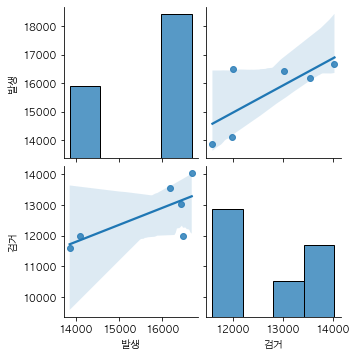

In [6]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[{'발생', '검거'}]

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [7]:
# 하나씩 시행해보기

# mu = mean (공통적으로 적용)
mu_1 = np.sum(data['발생'])/len(data['발생'])
mu_2 = np.sum(data['검거'])/len(data['검거'])

# var = variance (잔차의 재곱합의 평균), 표준편차 = var의 제곱근
var_1 = np.sum([pow(i - mu_1, 2) for i in data['발생']]) / (len(data['발생']))
var_2 = np.sum([pow(i - mu_2, 2) for i in data['검거']]) / (len(data['검거']))
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

# 공분산 (표본상관계수를 구하는 것이 아니고 모집단으로 도출하므로 자유도는 0으로 설정하였음.)
covariance = sum( (data['발생'] - mu_1) * (data['검거'] - mu_2) ) / (len(data['발생']))
correlation = covariance / (std_1 * std_2)

# COV(X,Y) : 모집단인 경우 (numpy와 비교)
print(covariance)
print(np.cov(data['발생'],data['검거'], ddof=0)) # 공분산 행렬의 (1,2), (2,1)이 COV(X,Y)

# 피어슨 상관계수
print(correlation)

765218.7222222221
[[1382711.22222222  765218.72222222]
 [ 765218.72222222  802485.55555556]]
0.7264424782283028


In [8]:
# 하나씩 시행해보기

# 만약 표본상관계수를 도출하게 된다면 (n-1로 또 나눠주어야 함)
# mu = mean (공통적으로 적용)
mu_1 = np.sum(data['발생'])/len(data['발생'])
mu_2 = np.sum(data['검거'])/len(data['검거'])
# 분산을 구하는 부분에서도 모분산 추정이므로 자유도 1 설정
var_1 = np.sum([pow(i - mu_1, 2) for i in data['발생']]) / (len(data['발생']) - 1)
var_2 = np.sum([pow(i - mu_2, 2) for i in data['검거']]) / (len(data['검거']) - 1)
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

covariance_ddof = sum( (data['발생'] - mu_1) * (data['검거'] - mu_2) ) / (len(data['발생']) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2)

# COV(X,Y) : 표본인 경우 (numpy와 비교)
print(covariance_ddof)
print(np.cov(data['발생'],data['검거']))
# 피어슨 상관계수
print(correlation_ddof)

918262.4666666666
[[1659253.46666667  918262.46666667]
 [ 918262.46666667  962982.66666667]]
0.7264424782283028


In [9]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr
# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(data['발생'], data['검거'])

(0.7264424782283028, 0.10201491339487691)

In [10]:
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(data['발생'], data['검거'], True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(data['발생'], data['검거'], False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 1382711.222, COV(Y,Y) = 802485.556(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 765218.722
모집단 data에 대한 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 1659253.467, COV(y,y) = 962982.667(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : 918262.467
표본 data로 추정한 모집단의 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


### 2. 스피어만 상관 계수

In [11]:
# 스피어만 계수는 순위합으로 도출되기 때문에, 이를 직접 구현하기 위해선 ordinalencoder로 순위를 구하고 순위합을 도출해야 함
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# transform data (데이터의 발생, 검거를 인코딩하는 작업)
result = encoder.fit_transform(data[{'발생', '검거'}])
result = pd.DataFrame(result, columns={'발생', '검거'})
# 순위 척도의 차이를 도출하는 부분
result['diff'] = result['발생'] - result['검거']
# 데이터 개수 지정
n = len(result['diff'])

# 스피어만 계수 산출하는 부분 (스피어만 계수 산출 공식 적용)
sum_diff = 6 * sum([pow(i, 2) for i in result['diff'].tolist()])
spearman = 1 - sum_diff/(n * (n ** 2 -1))
spearman


0.7714285714285715

In [12]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(data['발생'], data['검거'])

SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)

In [13]:
# 스피어만 계수는 순위 척도를 계산한 후에는 피어슨 계수와 구하는 공식이 동일하기 때문에 위의 피어슨 계수에 이를 입력하여도 동일한 결과를 가져옴
# 따라서 밑에는 피어슨 계수로 값이 출력되었지만, 사실은 스피어만 계수임 (따라서 공분산 값과 분산은 확인하지 않아도 됨)
cov_pearson(result['발생'], result['검거'], True)

print('\n스피어만 계수와 비교')
cov_pearson(data['발생'], data['검거'], True)

모집단 data 각각의 분산 값은 COV(X,X) = 2.917, COV(Y,Y) = 2.917(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 2.25
모집단 data에 대한 피어슨 상관계수 값 : 0.771
Scipy로 구한 피어슨 상관계수는 0.771입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 7.24%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

스피어만 계수와 비교
모집단 data 각각의 분산 값은 COV(X,X) = 1382711.222, COV(Y,Y) = 802485.556(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 765218.722
모집단 data에 대한 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


### 3. 켄달 상관계수

In [14]:
from scipy.stats import kendalltau

X = [12, 2, 1, 11, 3]
Y = [1, 4, 7, 2, 0]

kendalltau(X,Y)

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)

In [15]:
kendalltau(data['발생'], data['검거'])

KendalltauResult(correlation=0.6, pvalue=0.1361111111111111)

### 참고) heatmap

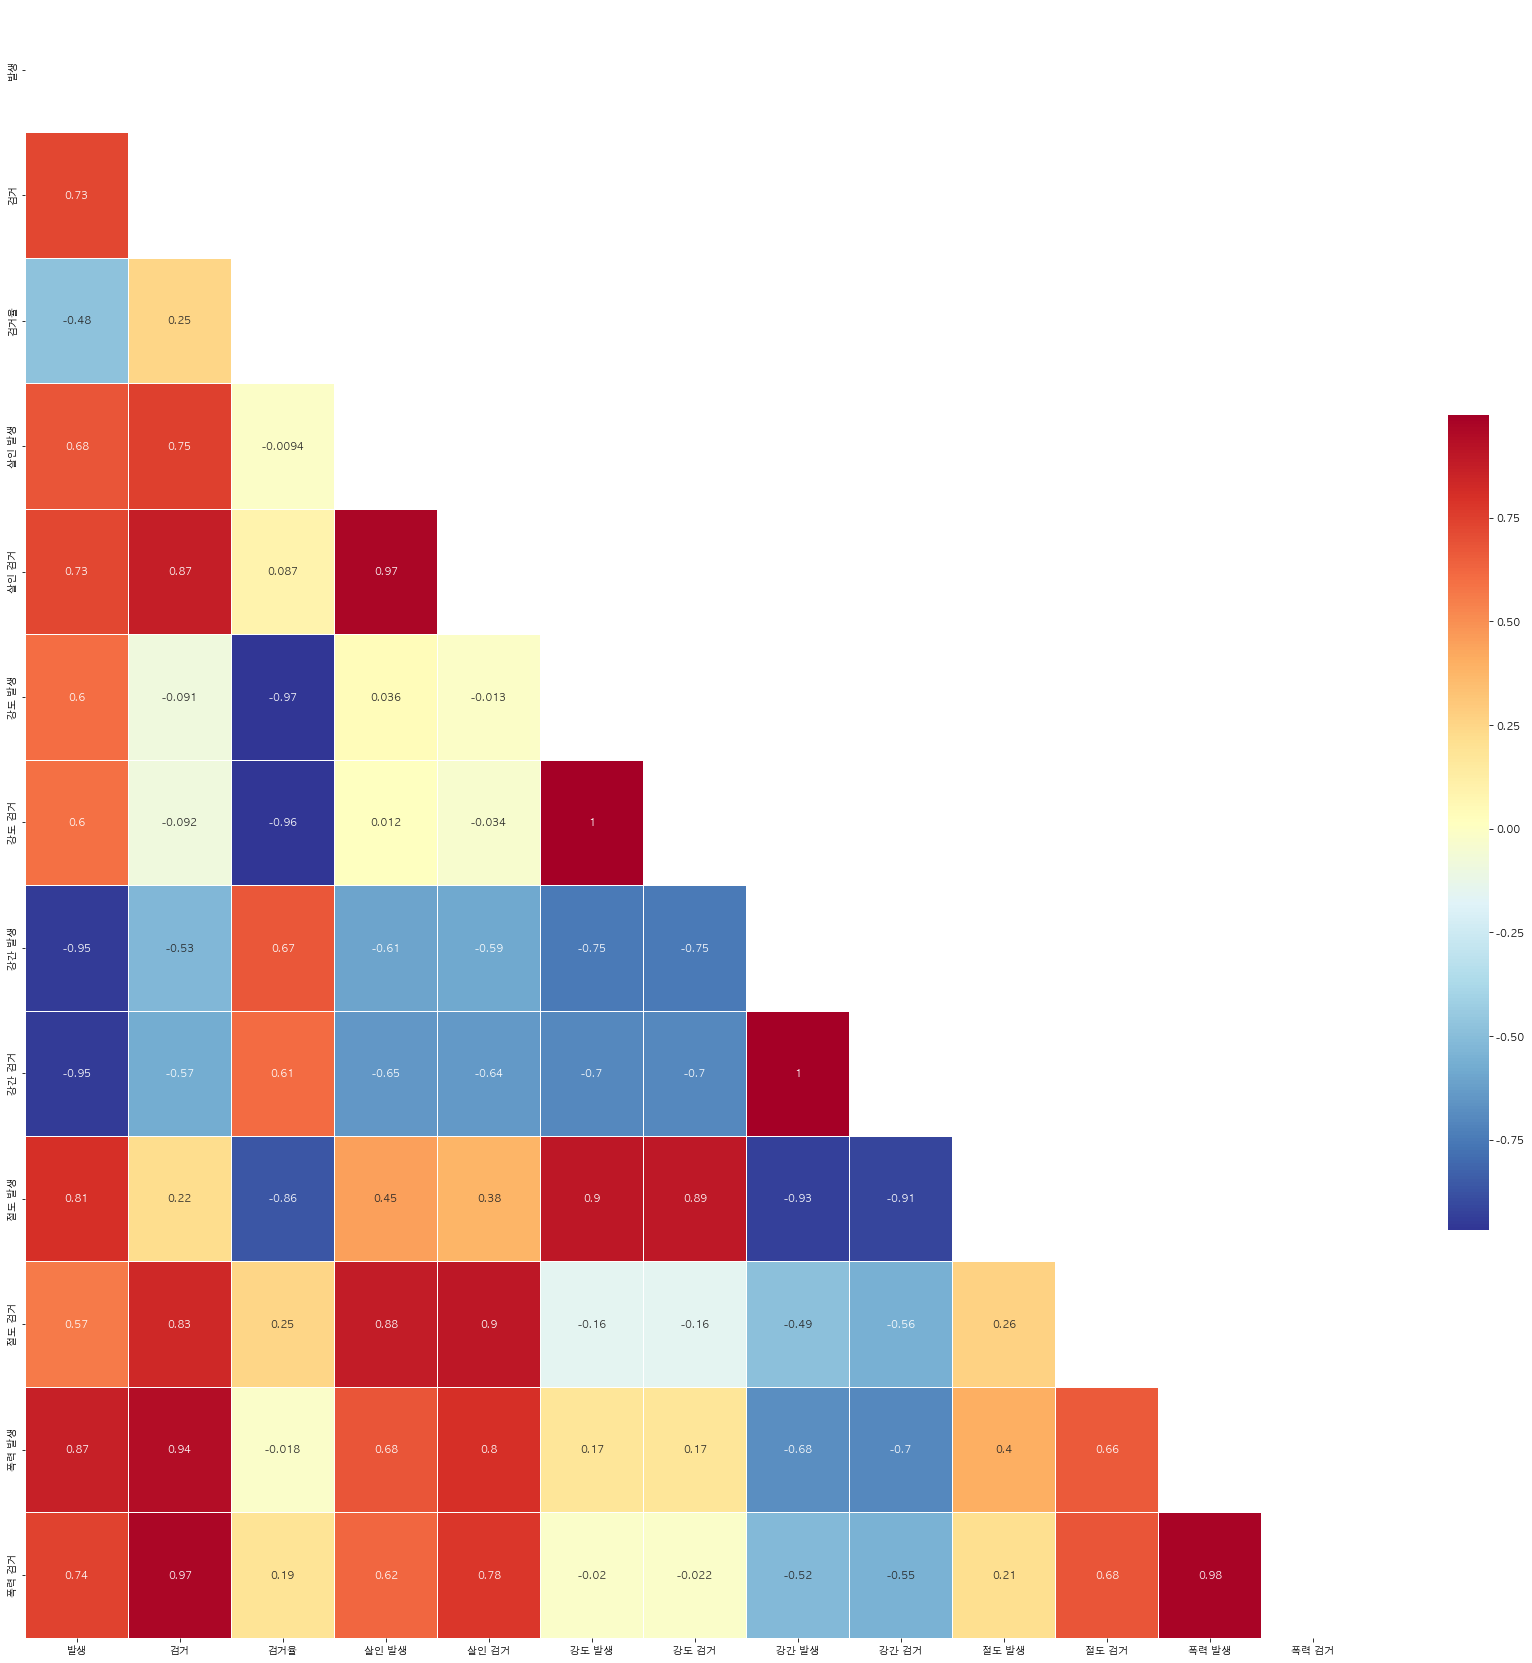

In [16]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
        method_option (str, optional): [correlation을 도출하는 방식 선택]. Defaults to 'pearson' in addition, there are other options ('spearman', 'kendall').
        
    """
    # 라이브러리 호출
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    # 한글폰트 출력 가능 코드
    from matplotlib import rc
    rc('font', family='AppleGothic') # Mac Os
    #rc('font', family='NanumGothic') # Windows Os
    plt.rcParams['axes.unicode_minus'] = False
    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(data.drop(columns='년도'))

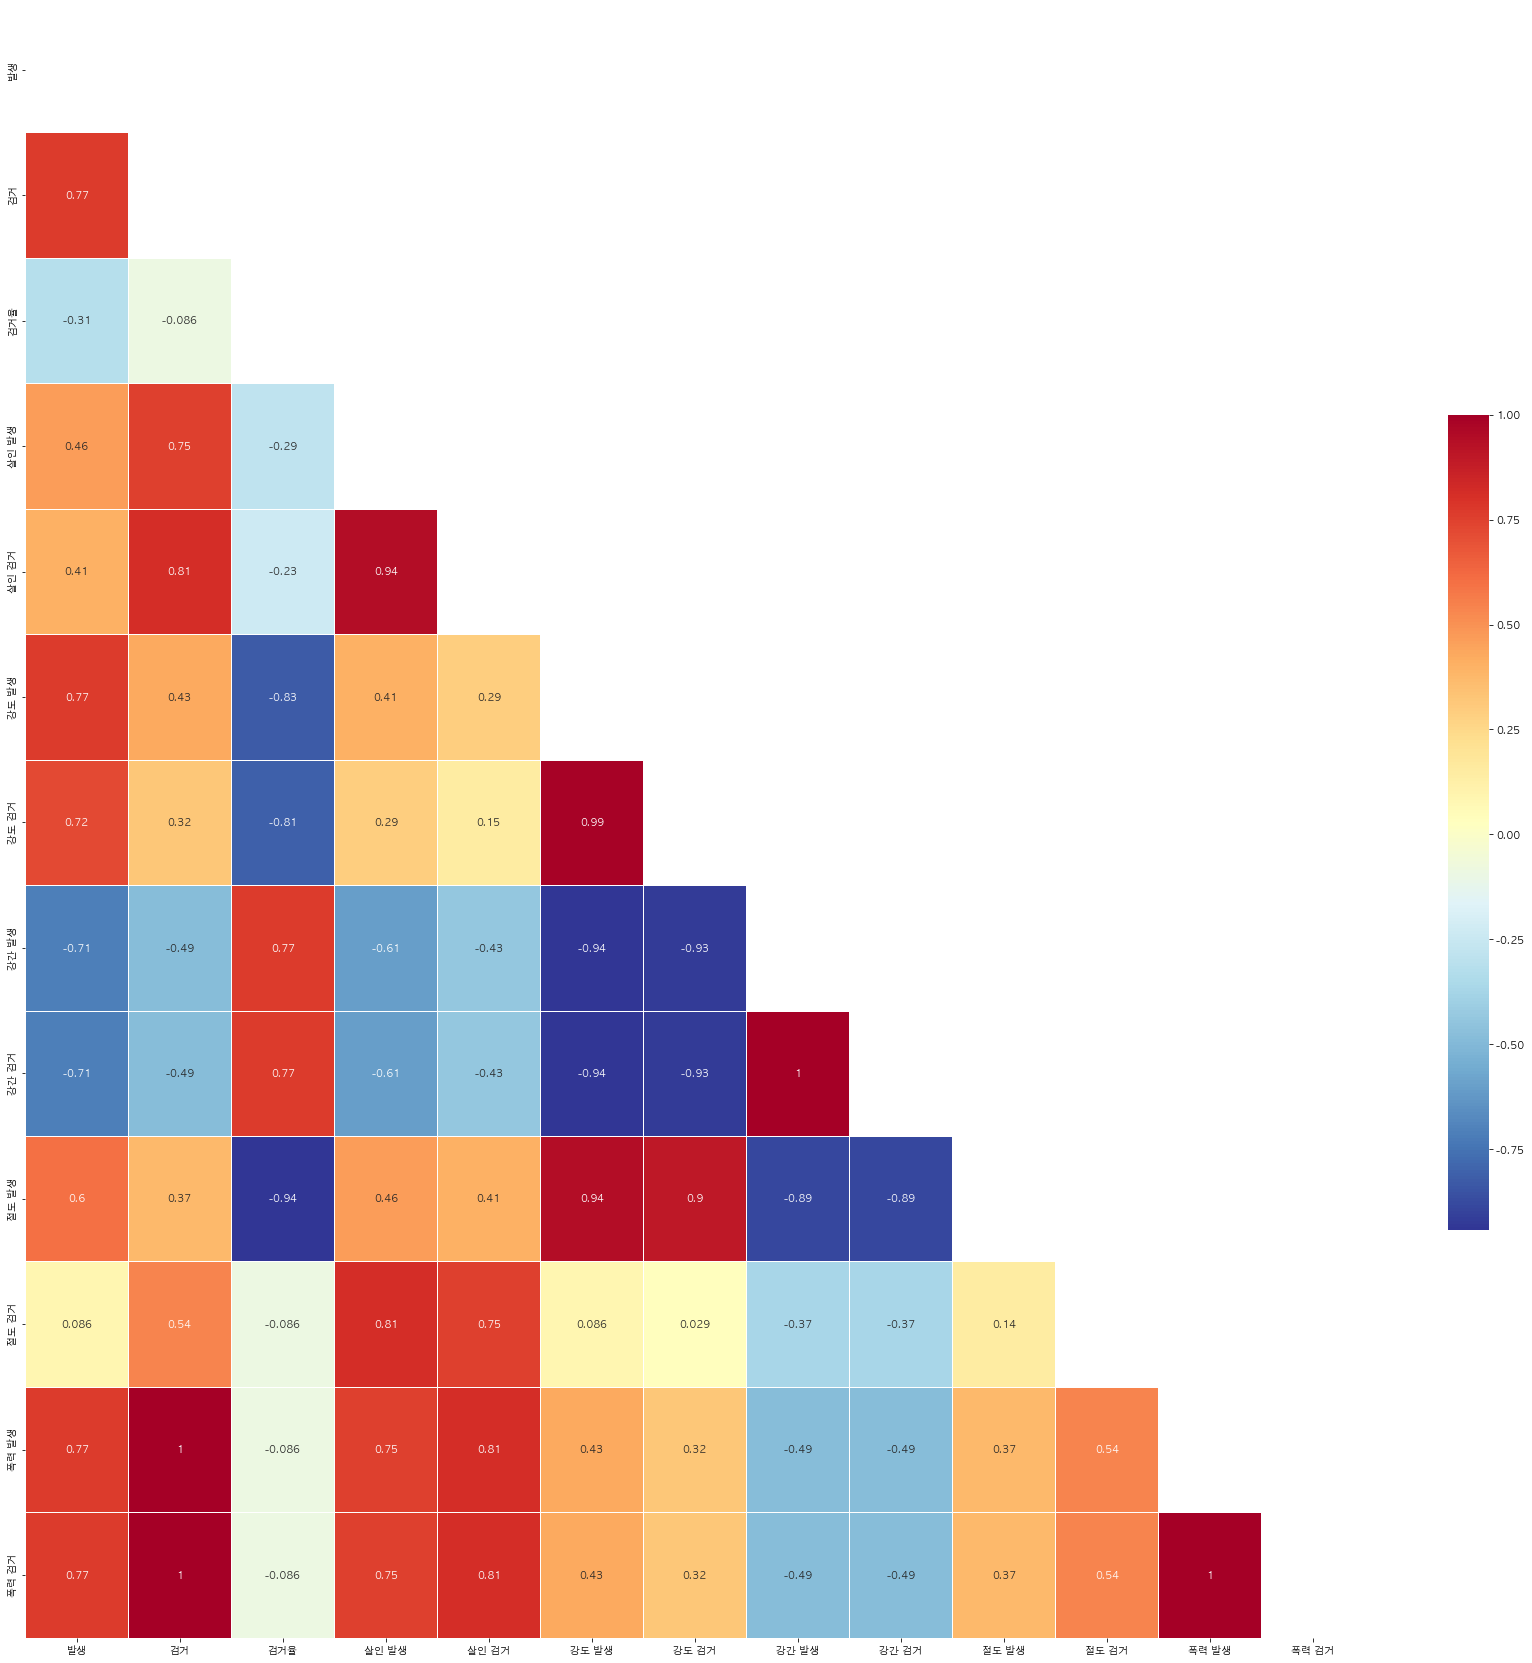

In [17]:
corr_heatmap(data.drop(columns='년도'), method_option='spearman')

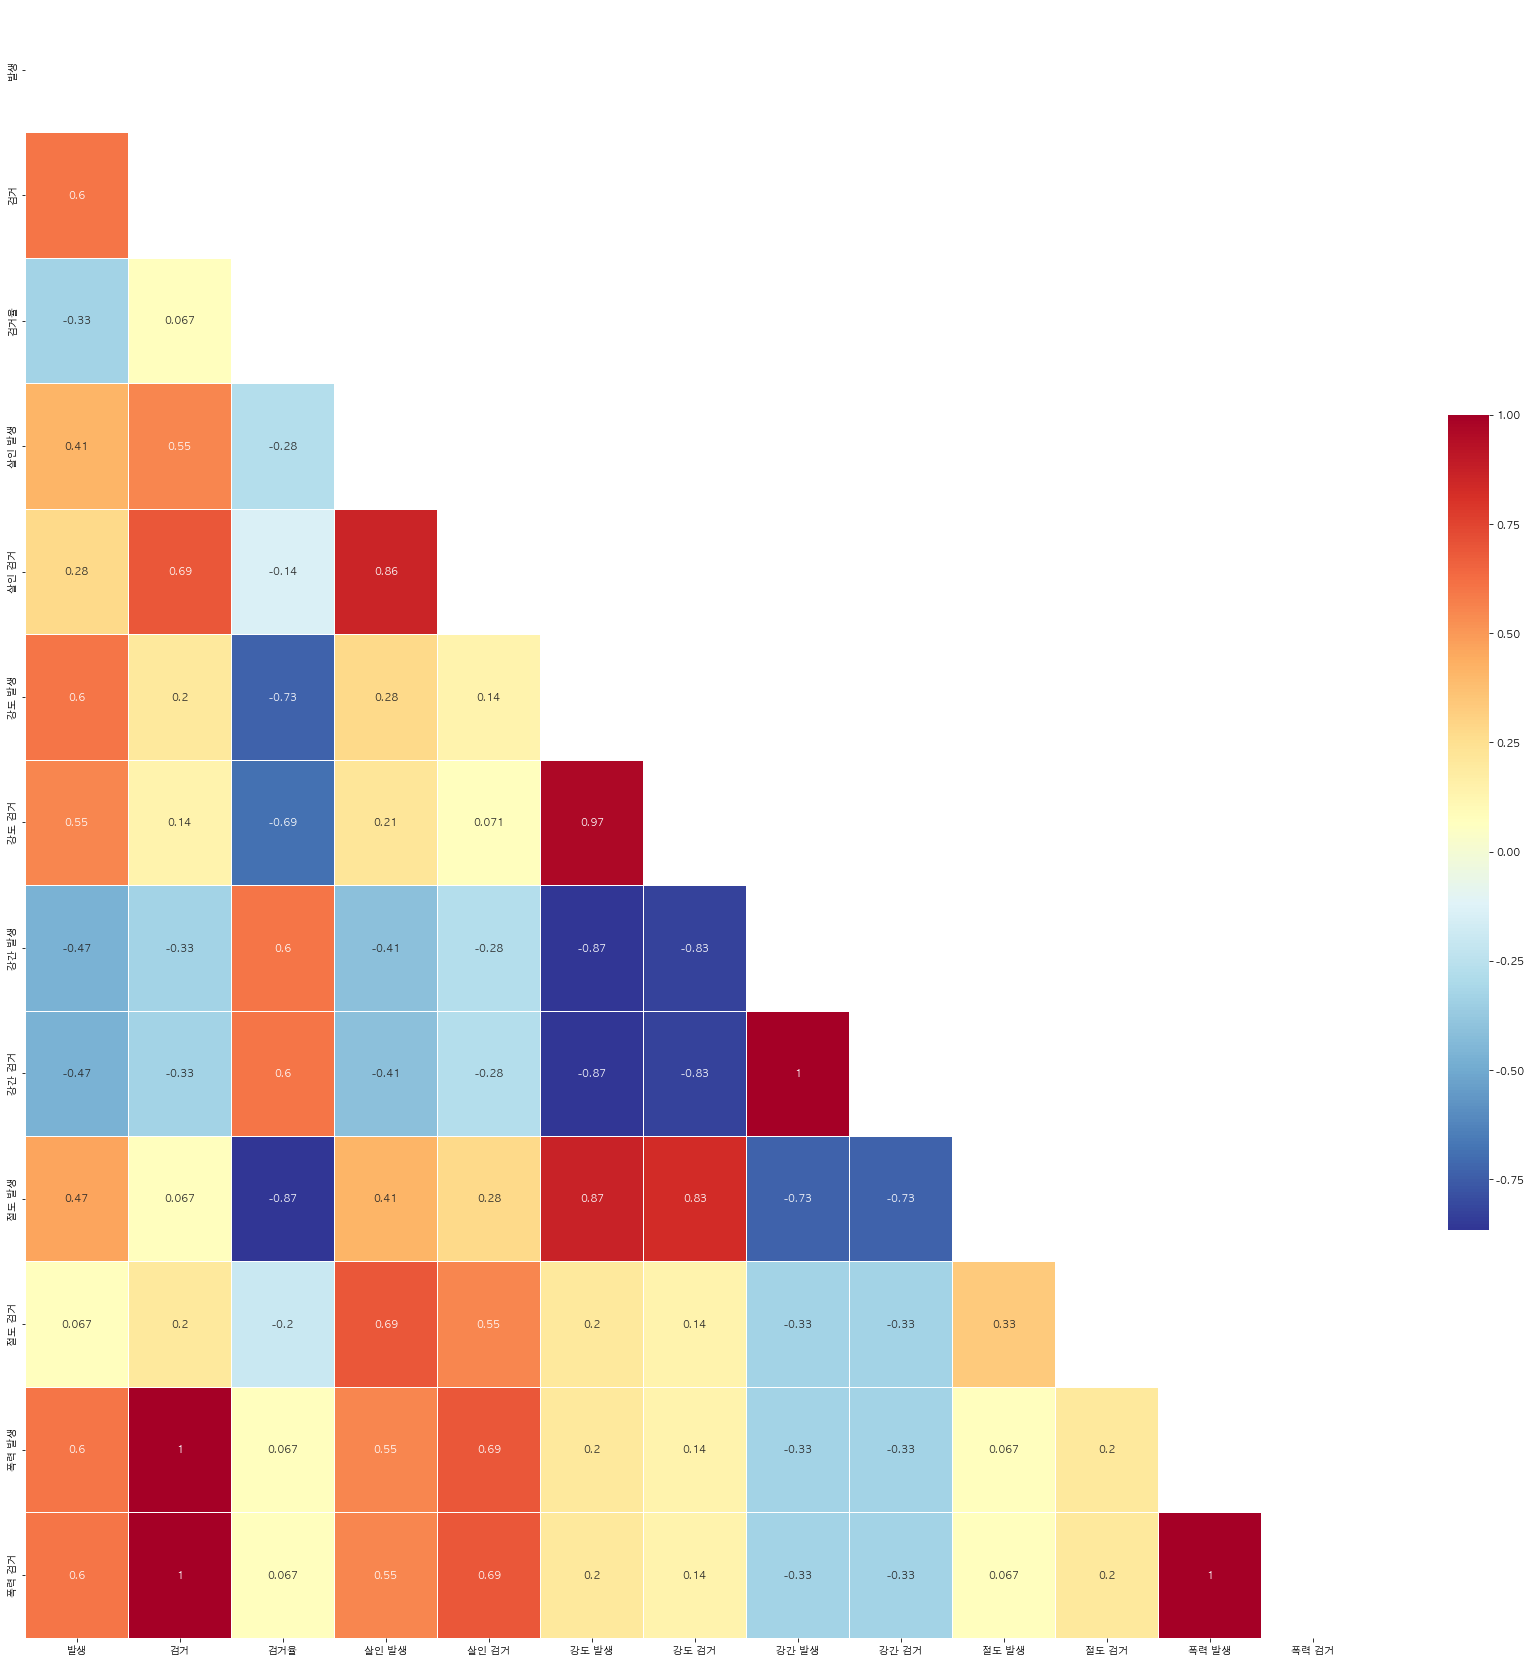

In [18]:
corr_heatmap(data.drop(columns='년도'), method_option='kendall')